# Dog Breed Classification menggunakan CNN

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools

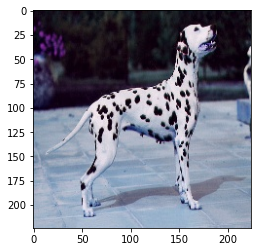

In [2]:
dalmation = cv2.imread('../../input/dataset-gerry-70-dog-breeds/train/Dalmation/01.jpg')
dalmation.shape
plt.imshow(dalmation)

In [3]:
class_folder_paths = ['../../input/dataset-gerry-70-dog-breeds/test/'+x for x in os.listdir('../../input/dataset-gerry-70-dog-breeds/test/')]
class_folder_paths

['../../input/dataset-gerry-70-dog-breeds/test/Afghan',
 '../../input/dataset-gerry-70-dog-breeds/test/African Wild Dog',
 '../../input/dataset-gerry-70-dog-breeds/test/Airedale',
 '../../input/dataset-gerry-70-dog-breeds/test/American Hairless',
 '../../input/dataset-gerry-70-dog-breeds/test/American Spaniel',
 '../../input/dataset-gerry-70-dog-breeds/test/Basenji',
 '../../input/dataset-gerry-70-dog-breeds/test/Basset',
 '../../input/dataset-gerry-70-dog-breeds/test/Beagle',
 '../../input/dataset-gerry-70-dog-breeds/test/Bearded Collie',
 '../../input/dataset-gerry-70-dog-breeds/test/Bermaise',
 '../../input/dataset-gerry-70-dog-breeds/test/Bichon Frise',
 '../../input/dataset-gerry-70-dog-breeds/test/Blenheim',
 '../../input/dataset-gerry-70-dog-breeds/test/Bloodhound',
 '../../input/dataset-gerry-70-dog-breeds/test/Bluetick',
 '../../input/dataset-gerry-70-dog-breeds/test/Border Collie',
 '../../input/dataset-gerry-70-dog-breeds/test/Borzoi',
 '../../input/dataset-gerry-70-dog-bree

#### Cek jumlah citra dalam tiap kelas

In [4]:
for class_folder_path in class_folder_paths:
    print('{0}:'.format(class_folder_path), ' ', len(os.listdir(class_folder_path)))

../../input/dataset-gerry-70-dog-breeds/test/Afghan:   10
../../input/dataset-gerry-70-dog-breeds/test/African Wild Dog:   10
../../input/dataset-gerry-70-dog-breeds/test/Airedale:   10
../../input/dataset-gerry-70-dog-breeds/test/American Hairless:   10
../../input/dataset-gerry-70-dog-breeds/test/American Spaniel:   10
../../input/dataset-gerry-70-dog-breeds/test/Basenji:   10
../../input/dataset-gerry-70-dog-breeds/test/Basset:   10
../../input/dataset-gerry-70-dog-breeds/test/Beagle:   10
../../input/dataset-gerry-70-dog-breeds/test/Bearded Collie:   10
../../input/dataset-gerry-70-dog-breeds/test/Bermaise:   10
../../input/dataset-gerry-70-dog-breeds/test/Bichon Frise:   10
../../input/dataset-gerry-70-dog-breeds/test/Blenheim:   10
../../input/dataset-gerry-70-dog-breeds/test/Bloodhound:   10
../../input/dataset-gerry-70-dog-breeds/test/Bluetick:   10
../../input/dataset-gerry-70-dog-breeds/test/Border Collie:   10
../../input/dataset-gerry-70-dog-breeds/test/Borzoi:   10
../../i

## Membangun Model

In [5]:
train_path = '../../input/dataset-gerry-70-dog-breeds/train'
valid_path = '../../input/dataset-gerry-70-dog-breeds/valid'
test_path = '../../input/dataset-gerry-70-dog-breeds/test'

train_batch_size = 10
val_batch_size = 10
image_size = 224

### Data Preprocessing

In [6]:
datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size)

test_batches = datagen.flow_from_directory(test_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [7]:
num_train_samples = 7946
num_val_samples = 700

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

### modifikasi model mobilenet

In [8]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [9]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:
x = mobile.layers[-6].output

x = Dropout(0.25)(x)
predictions = Dense(70, activation='softmax')(x)

model = Model(inputs=mobile.input, outputs=predictions)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [12]:
for layer in model.layers[:-23]:
    layer.trainable = False

## Training model

In [13]:
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [14]:
print(valid_batches.class_indices)

{'Afghan': 0, 'African Wild Dog': 1, 'Airedale': 2, 'American Hairless': 3, 'American Spaniel': 4, 'Basenji': 5, 'Basset': 6, 'Beagle': 7, 'Bearded Collie': 8, 'Bermaise': 9, 'Bichon Frise': 10, 'Blenheim': 11, 'Bloodhound': 12, 'Bluetick': 13, 'Border Collie': 14, 'Borzoi': 15, 'Boston Terrier': 16, 'Boxer': 17, 'Bull Mastiff': 18, 'Bull Terrier': 19, 'Bulldog': 20, 'Cairn': 21, 'Chihuahua': 22, 'Chinese Crested': 23, 'Chow': 24, 'Clumber': 25, 'Cockapoo': 26, 'Cocker': 27, 'Collie': 28, 'Corgi': 29, 'Coyote': 30, 'Dalmation': 31, 'Dhole': 32, 'Dingo': 33, 'Doberman': 34, 'Elk Hound': 35, 'French Bulldog': 36, 'German Sheperd': 37, 'Golden Retriever': 38, 'Great Dane': 39, 'Great Perenees': 40, 'Greyhound': 41, 'Groenendael': 42, 'Irish Spaniel': 43, 'Irish Wolfhound': 44, 'Japanese Spaniel': 45, 'Komondor': 46, 'Labradoodle': 47, 'Labrador': 48, 'Lhasa': 49, 'Malinois': 50, 'Maltese': 51, 'Mex Hairless': 52, 'Newfoundland': 53, 'Pekinese': 54, 'Pit Bull': 55, 'Pomeranian': 56, 'Poodl

### Training Percobaan 1 (LR 0.01, Epoch 10)

In [36]:
model.compile(Adam(lr=0.01), loss='mse', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [37]:
filepath = "model_lr1e-2_e10.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                              verbose=1, mode='max', min_lr=0.00001)
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_batches, steps_per_epoch=train_steps,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                    callbacks=callbacks_list)

Epoch 1/10
795/795 [==============================] - ETA: 0s - loss: 0.0146 - categorical_accuracy: 0.1377 - top_2_accuracy: 0.1934 - top_3_accuracy: 0.2293
Epoch 00001: val_top_3_accuracy improved from -inf to 0.10714, saving model to model_lr1e-2_e10.h5
795/795 [==============================] - 286s 360ms/step - loss: 0.0146 - categorical_accuracy: 0.1377 - top_2_accuracy: 0.1934 - top_3_accuracy: 0.2293 - val_loss: 0.0185 - val_categorical_accuracy: 0.0671 - val_top_2_accuracy: 0.0871 - val_top_3_accuracy: 0.1071
Epoch 2/10
795/795 [==============================] - ETA: 0s - loss: 0.0119 - categorical_accuracy: 0.3044 - top_2_accuracy: 0.4013 - top_3_accuracy: 0.4621
Epoch 00002: val_top_3_accuracy improved from 0.10714 to 0.60000, saving model to model_lr1e-2_e10.h5
795/795 [==============================] - 285s 358ms/step - loss: 0.0119 - categorical_accuracy: 0.3044 - top_2_accuracy: 0.4013 - top_3_accuracy: 0.4621 - val_loss: 0.0110 - val_categorical_accuracy: 0.4057 - val_t

### Training Percobaan 2 (LR 0.01, Epoch 15)

In [83]:
model.compile(Adam(lr=0.01), loss='mse', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [84]:
filepath = "model_lr1e-2_e15.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_batches, steps_per_epoch=train_steps,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=15, verbose=1,
                    callbacks=callbacks_list)

Epoch 1/15
795/795 [==============================] - ETA: 0s - loss: 0.0029 - categorical_accuracy: 0.8629 - top_2_accuracy: 0.9417 - top_3_accuracy: 0.9615
Epoch 00001: val_top_3_accuracy improved from -inf to 0.98714, saving model to model_lr1e-2_e15.h5
795/795 [==============================] - 305s 384ms/step - loss: 0.0029 - categorical_accuracy: 0.8629 - top_2_accuracy: 0.9417 - top_3_accuracy: 0.9615 - val_loss: 0.0024 - val_categorical_accuracy: 0.9000 - val_top_2_accuracy: 0.9714 - val_top_3_accuracy: 0.9871
Epoch 2/15
795/795 [==============================] - ETA: 0s - loss: 0.0029 - categorical_accuracy: 0.8627 - top_2_accuracy: 0.9382 - top_3_accuracy: 0.9630
Epoch 00002: val_top_3_accuracy did not improve from 0.98714
795/795 [==============================] - 310s 390ms/step - loss: 0.0029 - categorical_accuracy: 0.8627 - top_2_accuracy: 0.9382 - top_3_accuracy: 0.9630 - val_loss: 0.0026 - val_categorical_accuracy: 0.8857 - val_top_2_accuracy: 0.9700 - val_top_3_accurac

### Training Percobaan 3 (LR 0.01, Epoch 20)

In [15]:
model.compile(Adam(lr=0.01), loss='mse', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [16]:
filepath = "model_lr1e-2_e20.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_batches, steps_per_epoch=train_steps,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                    callbacks=callbacks_list)

Epoch 1/20
795/795 [==============================] - ETA: 0s - loss: 0.0154 - categorical_accuracy: 0.0444 - top_2_accuracy: 0.0760 - top_3_accuracy: 0.1012
Epoch 00001: val_top_3_accuracy improved from -inf to 0.09286, saving model to model_lr1e-2_e20.h5
795/795 [==============================] - 298s 375ms/step - loss: 0.0154 - categorical_accuracy: 0.0444 - top_2_accuracy: 0.0760 - top_3_accuracy: 0.1012 - val_loss: 0.0163 - val_categorical_accuracy: 0.0314 - val_top_2_accuracy: 0.0686 - val_top_3_accuracy: 0.0929
Epoch 2/20
795/795 [==============================] - ETA: 0s - loss: 0.0133 - categorical_accuracy: 0.1480 - top_2_accuracy: 0.2304 - top_3_accuracy: 0.2916
Epoch 00002: val_top_3_accuracy improved from 0.09286 to 0.24000, saving model to model_lr1e-2_e20.h5
795/795 [==============================] - 293s 369ms/step - loss: 0.0133 - categorical_accuracy: 0.1480 - top_2_accuracy: 0.2304 - top_3_accuracy: 0.2916 - val_loss: 0.0213 - val_categorical_accuracy: 0.1100 - val_t

Epoch 17/20
795/795 [==============================] - ETA: 0s - loss: 0.0015 - categorical_accuracy: 0.9275 - top_2_accuracy: 0.9693 - top_3_accuracy: 0.9799
Epoch 00017: val_top_3_accuracy did not improve from 0.99286
795/795 [==============================] - 277s 348ms/step - loss: 0.0015 - categorical_accuracy: 0.9275 - top_2_accuracy: 0.9693 - top_3_accuracy: 0.9799 - val_loss: 0.0020 - val_categorical_accuracy: 0.9043 - val_top_2_accuracy: 0.9886 - val_top_3_accuracy: 0.9929
Epoch 18/20
795/795 [==============================] - ETA: 0s - loss: 0.0014 - categorical_accuracy: 0.9346 - top_2_accuracy: 0.9724 - top_3_accuracy: 0.9818
Epoch 00018: val_top_3_accuracy did not improve from 0.99286

Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
795/795 [==============================] - 276s 347ms/step - loss: 0.0014 - categorical_accuracy: 0.9346 - top_2_accuracy: 0.9724 - top_3_accuracy: 0.9818 - val_loss: 0.0020 - val_categorical_accuracy: 0.9157 - v

### Training Percobaan 4 (LR 0.001, Epoch 10)

In [54]:
model.compile(Adam(lr=0.001), loss='mse', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [55]:
filepath = "model_lr1e-3_e10.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_batches, steps_per_epoch=train_steps,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                    callbacks=callbacks_list)

Epoch 1/10
795/795 [==============================] - ETA: 0s - loss: 0.0027 - categorical_accuracy: 0.8719 - top_2_accuracy: 0.9395 - top_3_accuracy: 0.9581
Epoch 00001: val_top_3_accuracy improved from -inf to 0.99143, saving model to model_lr1e-3_e10.h5
795/795 [==============================] - 284s 358ms/step - loss: 0.0027 - categorical_accuracy: 0.8719 - top_2_accuracy: 0.9395 - top_3_accuracy: 0.9581 - val_loss: 0.0018 - val_categorical_accuracy: 0.9129 - val_top_2_accuracy: 0.9800 - val_top_3_accuracy: 0.9914
Epoch 2/10
795/795 [==============================] - ETA: 0s - loss: 0.0022 - categorical_accuracy: 0.8979 - top_2_accuracy: 0.9537 - top_3_accuracy: 0.9693
Epoch 00002: val_top_3_accuracy improved from 0.99143 to 0.99429, saving model to model_lr1e-3_e10.h5
795/795 [==============================] - 284s 357ms/step - loss: 0.0022 - categorical_accuracy: 0.8979 - top_2_accuracy: 0.9537 - top_3_accuracy: 0.9693 - val_loss: 0.0017 - val_categorical_accuracy: 0.9186 - val_t

### Training Percobaan 5 (LR 0.001, Epoch 15)

In [17]:
model.compile(Adam(lr=0.001), loss='mse', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [18]:
filepath = "model_lr1e-3_e15.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                              verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_batches, steps_per_epoch=train_steps,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=15, verbose=1,
                    callbacks=callbacks_list)

Epoch 1/15
795/795 [==============================] - ETA: 0s - loss: 0.0111 - categorical_accuracy: 0.3725 - top_2_accuracy: 0.4673 - top_3_accuracy: 0.5140
Epoch 00001: val_top_3_accuracy improved from -inf to 0.68857, saving model to model_lr1e-3_e15.h5
795/795 [==============================] - 311s 392ms/step - loss: 0.0111 - categorical_accuracy: 0.3725 - top_2_accuracy: 0.4673 - top_3_accuracy: 0.5140 - val_loss: 0.0089 - val_categorical_accuracy: 0.5471 - val_top_2_accuracy: 0.6343 - val_top_3_accuracy: 0.6886
Epoch 2/15
795/795 [==============================] - ETA: 0s - loss: 0.0065 - categorical_accuracy: 0.6739 - top_2_accuracy: 0.7810 - top_3_accuracy: 0.8227
Epoch 00002: val_top_3_accuracy improved from 0.68857 to 0.88714, saving model to model_lr1e-3_e15.h5
795/795 [==============================] - 317s 398ms/step - loss: 0.0065 - categorical_accuracy: 0.6739 - top_2_accuracy: 0.7810 - top_3_accuracy: 0.8227 - val_loss: 0.0049 - val_categorical_accuracy: 0.7571 - val_t

### Training Percobaan 6 (LR 0.001, Epoch 20)

In [19]:
model.compile(Adam(lr=0.001), loss='mse', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [20]:
filepath = "model_lr1e-3_e20.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                              verbose=1, mode='max', min_lr=0.00001)
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_batches, steps_per_epoch=train_steps,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                    callbacks=callbacks_list)

Epoch 1/20
795/795 [==============================] - ETA: 0s - loss: 0.0098 - categorical_accuracy: 0.4645 - top_2_accuracy: 0.5656 - top_3_accuracy: 0.6212
Epoch 00001: val_top_3_accuracy improved from -inf to 0.79571, saving model to model_lr1e-3_e20.h5
795/795 [==============================] - 297s 373ms/step - loss: 0.0098 - categorical_accuracy: 0.4645 - top_2_accuracy: 0.5656 - top_3_accuracy: 0.6212 - val_loss: 0.0077 - val_categorical_accuracy: 0.6414 - val_top_2_accuracy: 0.7500 - val_top_3_accuracy: 0.7957
Epoch 2/20
795/795 [==============================] - ETA: 0s - loss: 0.0059 - categorical_accuracy: 0.7075 - top_2_accuracy: 0.8120 - top_3_accuracy: 0.8517
Epoch 00002: val_top_3_accuracy improved from 0.79571 to 0.91286, saving model to model_lr1e-3_e20.h5
795/795 [==============================] - 288s 362ms/step - loss: 0.0059 - categorical_accuracy: 0.7075 - top_2_accuracy: 0.8120 - top_3_accuracy: 0.8517 - val_loss: 0.0052 - val_categorical_accuracy: 0.7471 - val_t

Epoch 17/20
795/795 [==============================] - ETA: 0s - loss: 2.0045e-04 - categorical_accuracy: 0.9918 - top_2_accuracy: 0.9950 - top_3_accuracy: 0.9958
Epoch 00017: val_top_3_accuracy did not improve from 1.00000
795/795 [==============================] - 287s 361ms/step - loss: 2.0045e-04 - categorical_accuracy: 0.9918 - top_2_accuracy: 0.9950 - top_3_accuracy: 0.9958 - val_loss: 9.3306e-04 - val_categorical_accuracy: 0.9557 - val_top_2_accuracy: 0.9914 - val_top_3_accuracy: 1.0000
Epoch 18/20
795/795 [==============================] - ETA: 0s - loss: 1.7259e-04 - categorical_accuracy: 0.9927 - top_2_accuracy: 0.9955 - top_3_accuracy: 0.9957
Epoch 00018: val_top_3_accuracy did not improve from 1.00000

Epoch 00018: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
795/795 [==============================] - 287s 362ms/step - loss: 1.7259e-04 - categorical_accuracy: 0.9927 - top_2_accuracy: 0.9955 - top_3_accuracy: 0.9957 - val_loss: 9.1114e-04 - val_categori

## confusion matrix & classification report

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                          
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Confusion Matrix - Percobaan 1

In [104]:
model.load_weights('model_lr1e-2_e10.h5')

In [105]:
predictions = model.predict(test_batches, steps=700, verbose=1)

700/700 [==============================] - 20s 28ms/step


In [106]:
test_labels = test_batches.classes

In [107]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [108]:
test_batches.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

Confusion matrix, without normalization
[[ 8  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  7]]


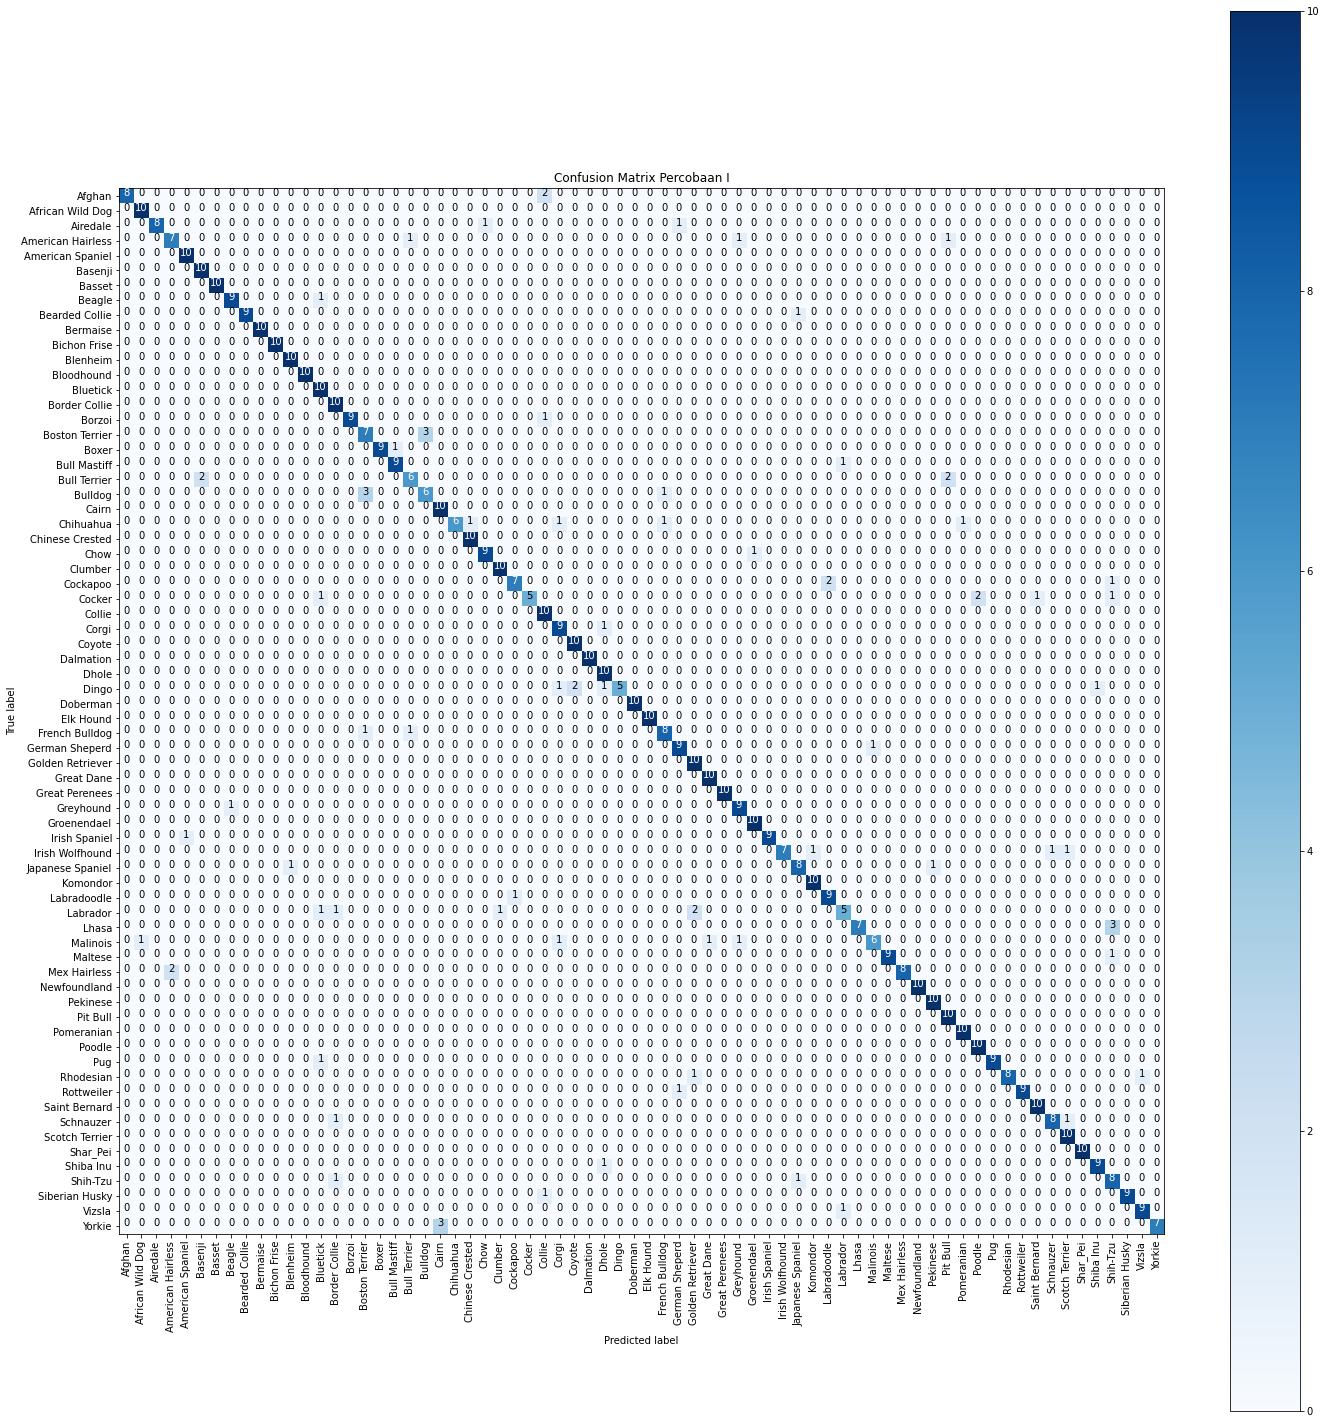

In [109]:
cm_plot_labels = ['Afghan','African Wild Dog','Airedale','American Hairless','American Spaniel','Basenji','Basset','Beagle','Bearded Collie','Bermaise','Bichon Frise','Blenheim','Bloodhound','Bluetick','Border Collie','Borzoi','Boston Terrier','Boxer','Bull Mastiff','Bull Terrier','Bulldog','Cairn','Chihuahua','Chinese Crested','Chow','Clumber','Cockapoo','Cocker','Collie','Corgi','Coyote','Dalmation','Dhole','Dingo','Doberman','Elk Hound','French Bulldog','German Sheperd','Golden Retriever','Great Dane','Great Perenees','Greyhound','Groenendael','Irish Spaniel','Irish Wolfhound','Japanese Spaniel','Komondor','Labradoodle','Labrador','Lhasa','Malinois','Maltese','Mex Hairless','Newfoundland','Pekinese','Pit Bull','Pomeranian','Poodle','Pug','Rhodesian','Rottweiler','Saint Bernard','Schnauzer','Scotch Terrier','Shar_Pei','Shiba Inu','Shih-Tzu','Siberian Husky','Vizsla','Yorkie']
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix Percobaan I')

### Classification Report - Percobaan 1

In [69]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

In [70]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)
print(report)

                   precision    recall  f1-score   support

           Afghan       1.00      0.80      0.89        10
 African Wild Dog       0.91      1.00      0.95        10
         Airedale       1.00      0.80      0.89        10
American Hairless       0.78      0.70      0.74        10
 American Spaniel       0.91      1.00      0.95        10
          Basenji       0.83      1.00      0.91        10
           Basset       1.00      1.00      1.00        10
           Beagle       0.90      0.90      0.90        10
   Bearded Collie       1.00      0.90      0.95        10
         Bermaise       1.00      1.00      1.00        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       0.91      1.00      0.95        10
       Bloodhound       1.00      1.00      1.00        10
         Bluetick       0.71      1.00      0.83        10
    Border Collie       0.77      1.00      0.87        10
           Borzoi       1.00      0.90      0.95       

### Confusion Matrix - Percobaan 2

In [25]:
model.load_weights('model_lr1e-2_e15.h5')

In [26]:
predictions = model.predict(test_batches, steps=700, verbose=1)

700/700 [==============================] - 19s 27ms/step


In [27]:
test_labels = test_batches.classes

In [28]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [29]:
test_batches.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

Confusion matrix, without normalization
[[ 9  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


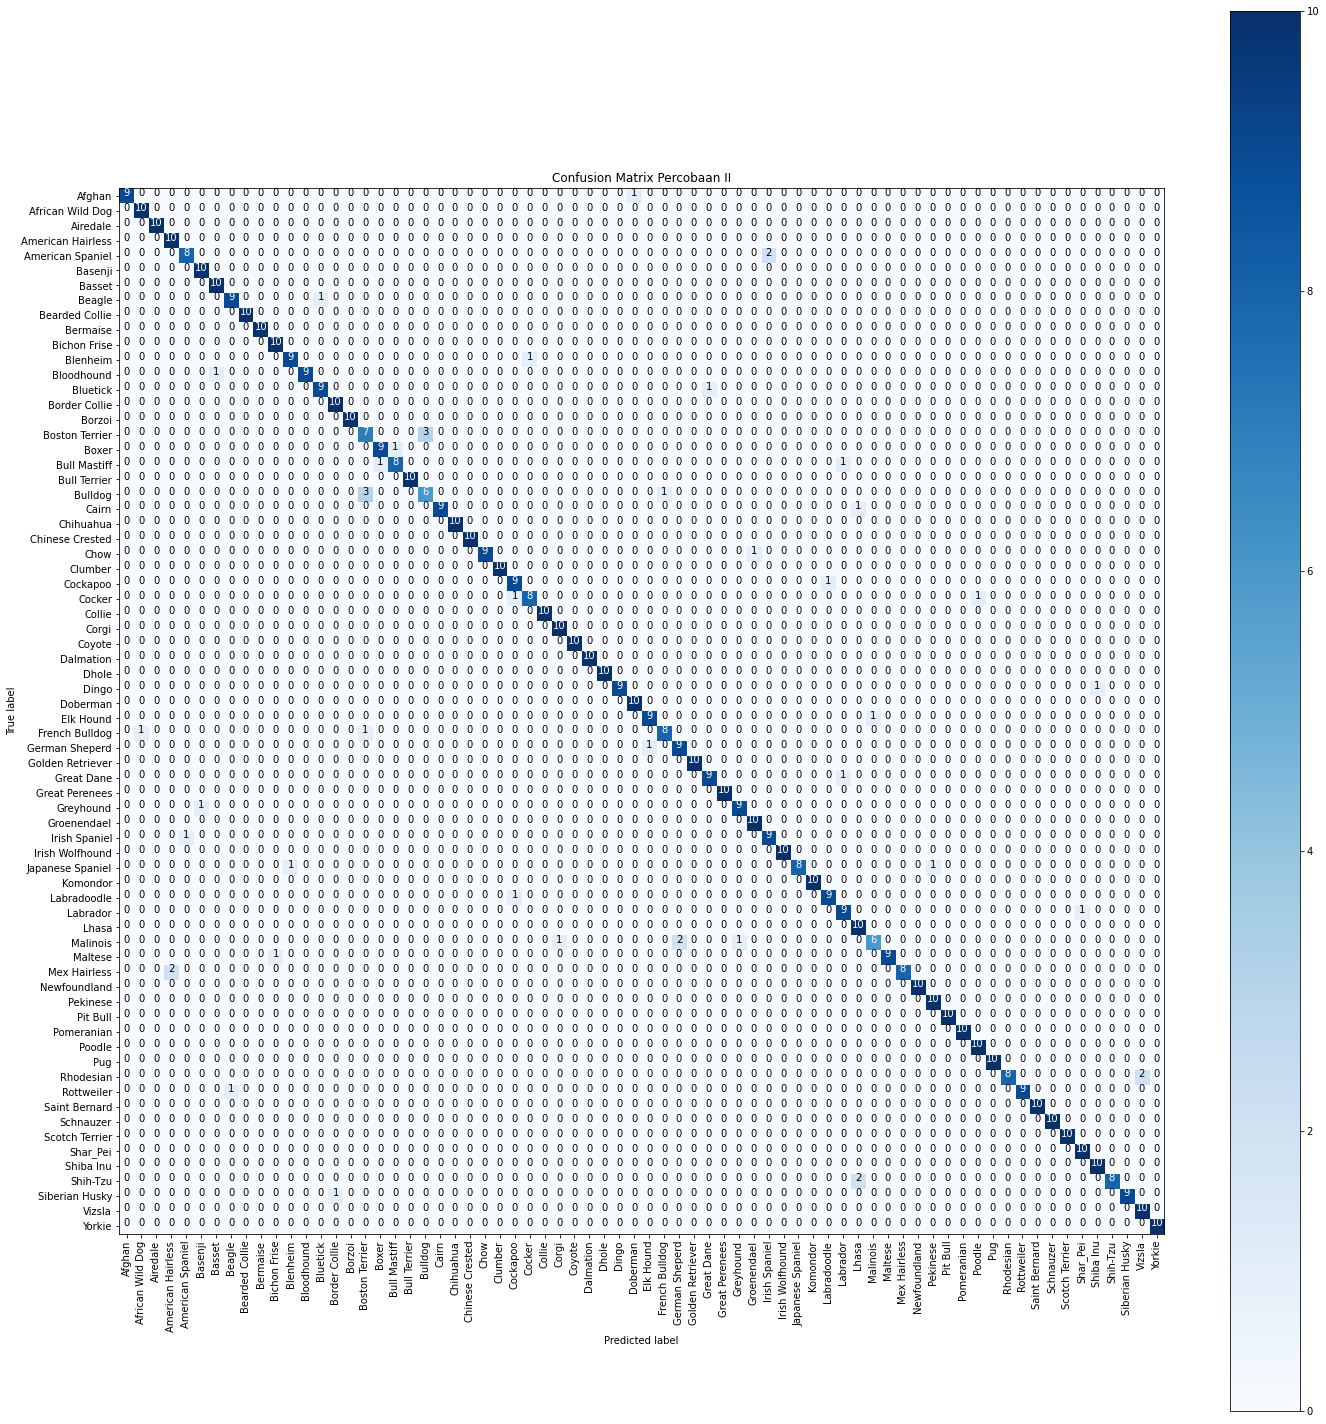

In [30]:
cm_plot_labels = ['Afghan','African Wild Dog','Airedale','American Hairless','American Spaniel','Basenji','Basset','Beagle','Bearded Collie','Bermaise','Bichon Frise','Blenheim','Bloodhound','Bluetick','Border Collie','Borzoi','Boston Terrier','Boxer','Bull Mastiff','Bull Terrier','Bulldog','Cairn','Chihuahua','Chinese Crested','Chow','Clumber','Cockapoo','Cocker','Collie','Corgi','Coyote','Dalmation','Dhole','Dingo','Doberman','Elk Hound','French Bulldog','German Sheperd','Golden Retriever','Great Dane','Great Perenees','Greyhound','Groenendael','Irish Spaniel','Irish Wolfhound','Japanese Spaniel','Komondor','Labradoodle','Labrador','Lhasa','Malinois','Maltese','Mex Hairless','Newfoundland','Pekinese','Pit Bull','Pomeranian','Poodle','Pug','Rhodesian','Rottweiler','Saint Bernard','Schnauzer','Scotch Terrier','Shar_Pei','Shiba Inu','Shih-Tzu','Siberian Husky','Vizsla','Yorkie']
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix Percobaan II')

### Classification Report - Percobaan 2

In [77]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

In [78]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)
print(report)

                   precision    recall  f1-score   support

           Afghan       1.00      0.90      0.95        10
 African Wild Dog       0.91      1.00      0.95        10
         Airedale       1.00      1.00      1.00        10
American Hairless       0.83      1.00      0.91        10
 American Spaniel       0.89      0.80      0.84        10
          Basenji       0.91      1.00      0.95        10
           Basset       0.91      1.00      0.95        10
           Beagle       0.90      0.90      0.90        10
   Bearded Collie       1.00      1.00      1.00        10
         Bermaise       1.00      1.00      1.00        10
     Bichon Frise       0.91      1.00      0.95        10
         Blenheim       0.90      0.90      0.90        10
       Bloodhound       1.00      0.90      0.95        10
         Bluetick       0.90      0.90      0.90        10
    Border Collie       0.91      1.00      0.95        10
           Borzoi       1.00      1.00      1.00       

### Confusion Matrix - Percobaan 3

In [31]:
model.load_weights('model_lr1e-2_e20.h5')

In [32]:
predictions = model.predict(test_batches, steps=700, verbose=1)

700/700 [==============================] - 19s 27ms/step


In [33]:
test_labels = test_batches.classes

In [34]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [35]:
test_batches.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

Confusion matrix, without normalization
[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0 10]]


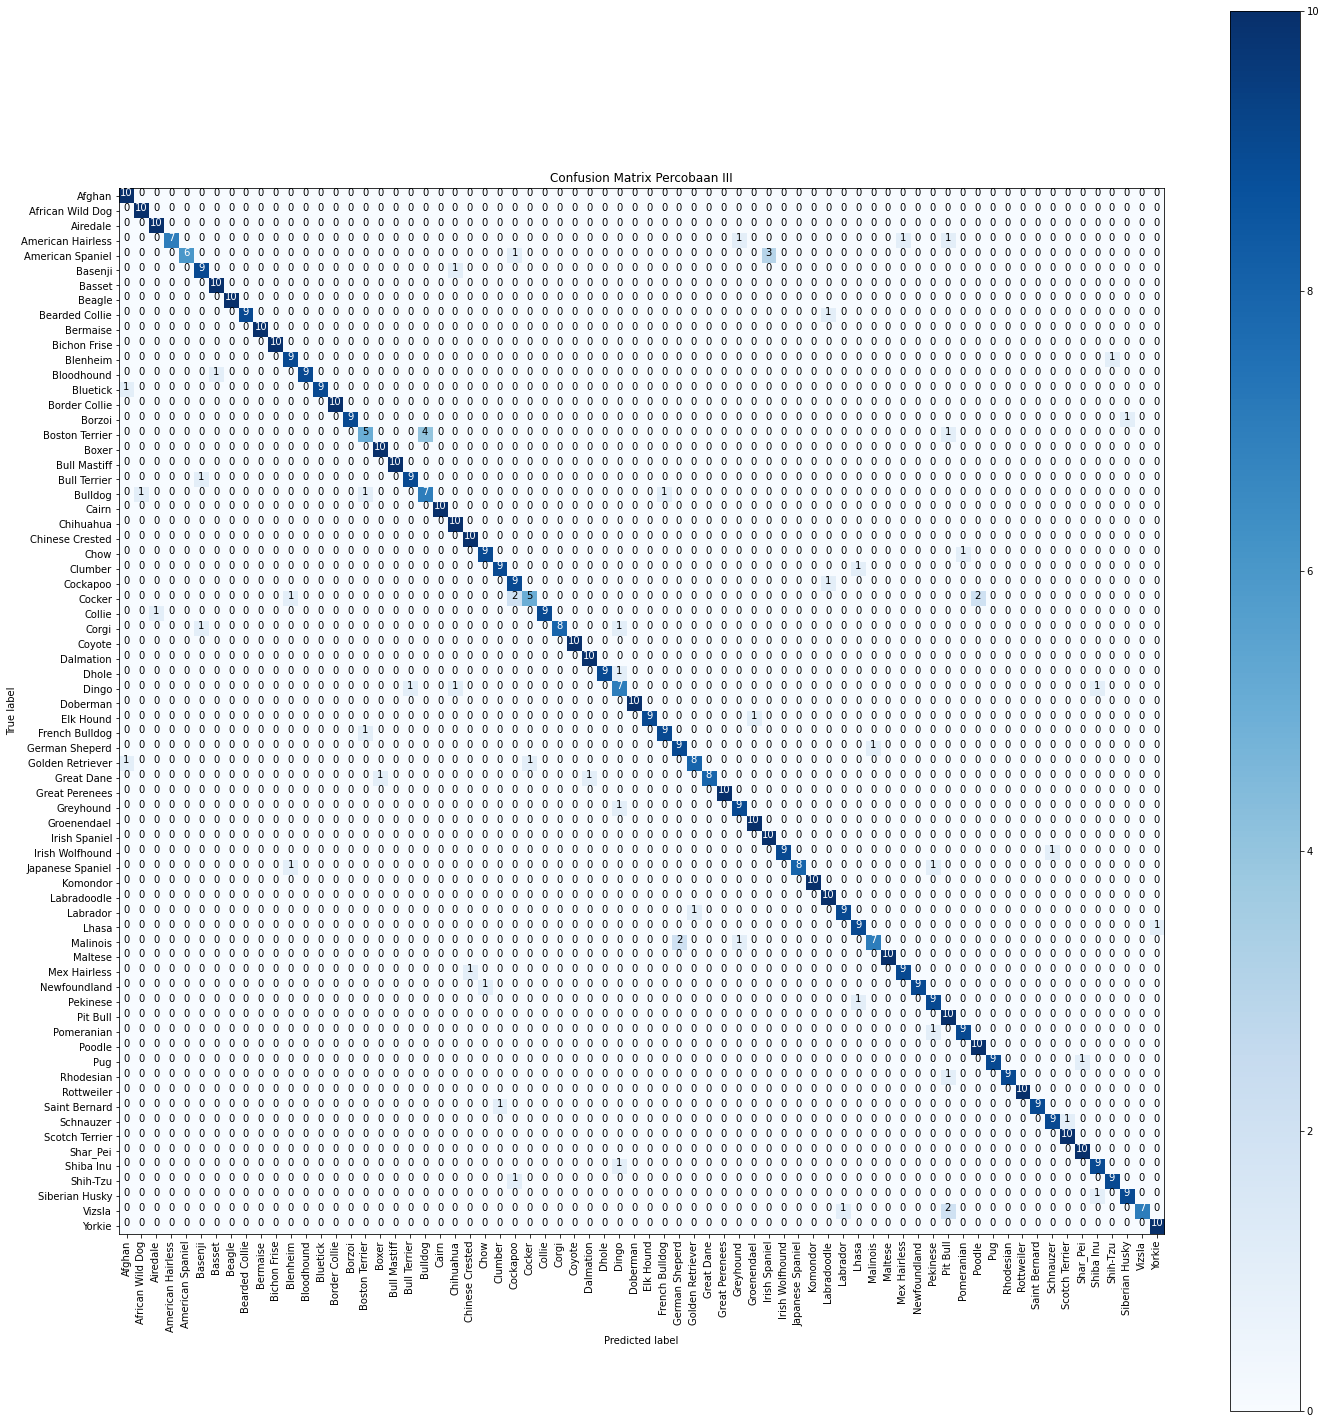

In [36]:
cm_plot_labels = ['Afghan','African Wild Dog','Airedale','American Hairless','American Spaniel','Basenji','Basset','Beagle','Bearded Collie','Bermaise','Bichon Frise','Blenheim','Bloodhound','Bluetick','Border Collie','Borzoi','Boston Terrier','Boxer','Bull Mastiff','Bull Terrier','Bulldog','Cairn','Chihuahua','Chinese Crested','Chow','Clumber','Cockapoo','Cocker','Collie','Corgi','Coyote','Dalmation','Dhole','Dingo','Doberman','Elk Hound','French Bulldog','German Sheperd','Golden Retriever','Great Dane','Great Perenees','Greyhound','Groenendael','Irish Spaniel','Irish Wolfhound','Japanese Spaniel','Komondor','Labradoodle','Labrador','Lhasa','Malinois','Maltese','Mex Hairless','Newfoundland','Pekinese','Pit Bull','Pomeranian','Poodle','Pug','Rhodesian','Rottweiler','Saint Bernard','Schnauzer','Scotch Terrier','Shar_Pei','Shiba Inu','Shih-Tzu','Siberian Husky','Vizsla','Yorkie']
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix Percobaan III')

### Classification Report - Percobaan 3

In [31]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

In [32]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)
print(report)

                   precision    recall  f1-score   support

           Afghan       0.83      1.00      0.91        10
 African Wild Dog       0.91      1.00      0.95        10
         Airedale       0.91      1.00      0.95        10
American Hairless       1.00      0.70      0.82        10
 American Spaniel       1.00      0.60      0.75        10
          Basenji       0.82      0.90      0.86        10
           Basset       0.91      1.00      0.95        10
           Beagle       1.00      1.00      1.00        10
   Bearded Collie       1.00      0.90      0.95        10
         Bermaise       1.00      1.00      1.00        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       0.82      0.90      0.86        10
       Bloodhound       1.00      0.90      0.95        10
         Bluetick       1.00      0.90      0.95        10
    Border Collie       1.00      1.00      1.00        10
           Borzoi       1.00      0.90      0.95       

### Confusion Matrix - Percobaan 4

In [37]:
model.load_weights('model_lr1e-3_e10.h5')

In [38]:
predictions = model.predict(test_batches, steps=700, verbose=1)

700/700 [==============================] - 19s 27ms/step


In [39]:
test_labels = test_batches.classes

In [40]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [41]:
test_batches.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

Confusion matrix, without normalization
[[ 9  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


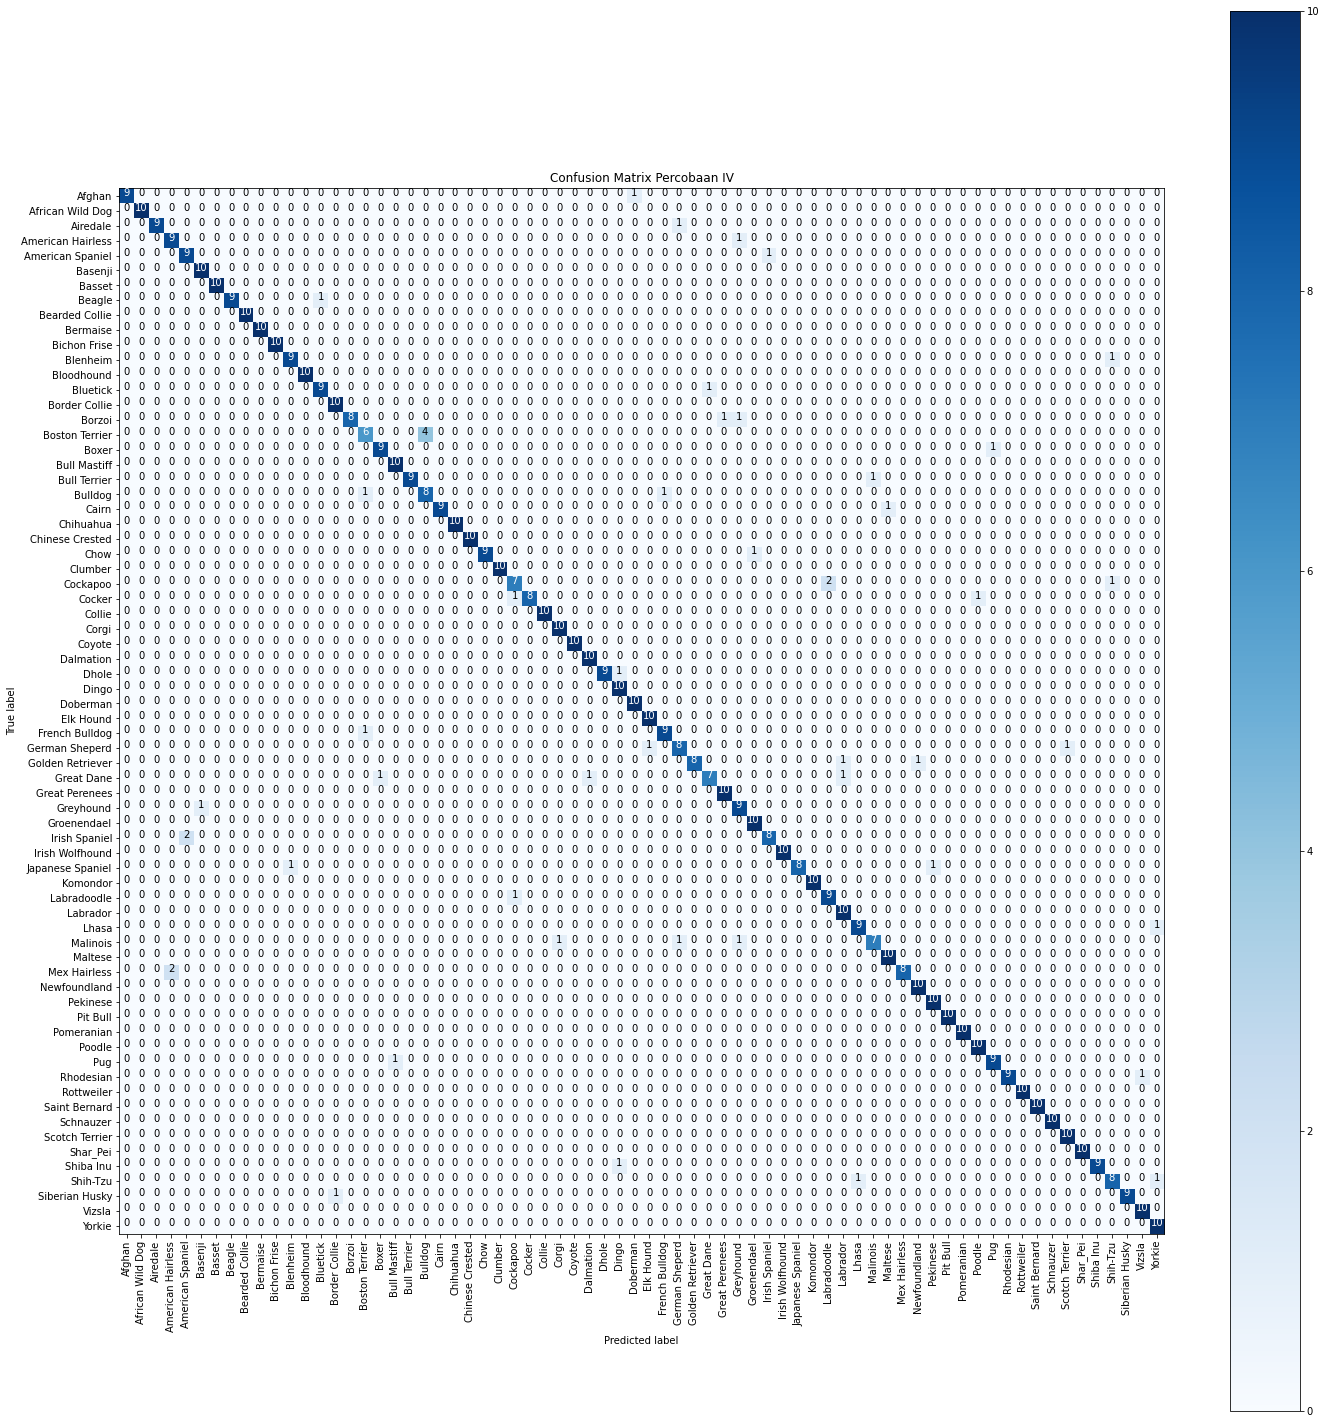

In [42]:
cm_plot_labels = ['Afghan','African Wild Dog','Airedale','American Hairless','American Spaniel','Basenji','Basset','Beagle','Bearded Collie','Bermaise','Bichon Frise','Blenheim','Bloodhound','Bluetick','Border Collie','Borzoi','Boston Terrier','Boxer','Bull Mastiff','Bull Terrier','Bulldog','Cairn','Chihuahua','Chinese Crested','Chow','Clumber','Cockapoo','Cocker','Collie','Corgi','Coyote','Dalmation','Dhole','Dingo','Doberman','Elk Hound','French Bulldog','German Sheperd','Golden Retriever','Great Dane','Great Perenees','Greyhound','Groenendael','Irish Spaniel','Irish Wolfhound','Japanese Spaniel','Komondor','Labradoodle','Labrador','Lhasa','Malinois','Maltese','Mex Hairless','Newfoundland','Pekinese','Pit Bull','Pomeranian','Poodle','Pug','Rhodesian','Rottweiler','Saint Bernard','Schnauzer','Scotch Terrier','Shar_Pei','Shiba Inu','Shih-Tzu','Siberian Husky','Vizsla','Yorkie']
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix Percobaan IV')

### Classification Report - Percobaan 4

In [85]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

In [86]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)
print(report)

                   precision    recall  f1-score   support

           Afghan       1.00      0.90      0.95        10
 African Wild Dog       1.00      1.00      1.00        10
         Airedale       1.00      0.90      0.95        10
American Hairless       0.82      0.90      0.86        10
 American Spaniel       0.82      0.90      0.86        10
          Basenji       0.91      1.00      0.95        10
           Basset       1.00      1.00      1.00        10
           Beagle       1.00      0.90      0.95        10
   Bearded Collie       1.00      1.00      1.00        10
         Bermaise       1.00      1.00      1.00        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       0.90      0.90      0.90        10
       Bloodhound       1.00      1.00      1.00        10
         Bluetick       0.90      0.90      0.90        10
    Border Collie       0.91      1.00      0.95        10
           Borzoi       1.00      0.80      0.89       

### Confusion Matrix - Percobaan 5

In [43]:
model.load_weights('model_lr1e-3_e15.h5')

In [44]:
predictions = model.predict(test_batches, steps=700, verbose=1)

700/700 [==============================] - 21s 30ms/step


In [45]:
test_labels = test_batches.classes

In [46]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [47]:
test_batches.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

Confusion matrix, without normalization
[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  1]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


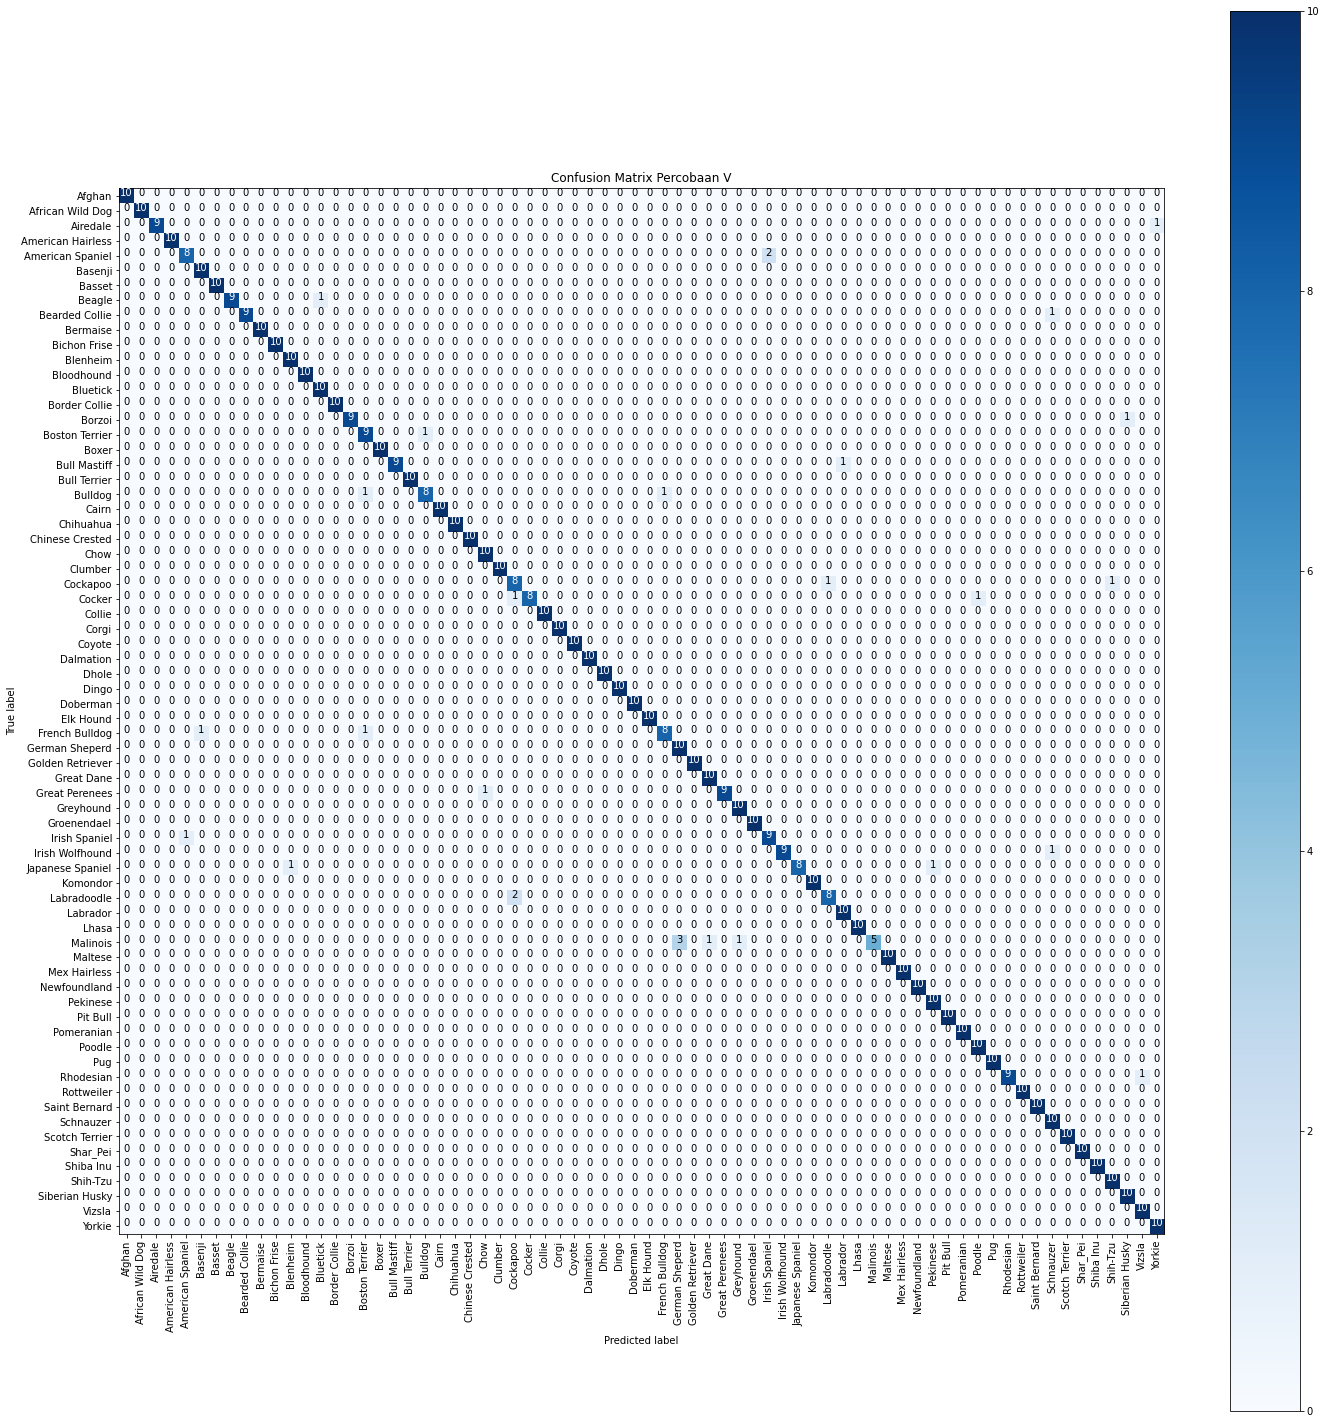

In [48]:
cm_plot_labels = ['Afghan','African Wild Dog','Airedale','American Hairless','American Spaniel','Basenji','Basset','Beagle','Bearded Collie','Bermaise','Bichon Frise','Blenheim','Bloodhound','Bluetick','Border Collie','Borzoi','Boston Terrier','Boxer','Bull Mastiff','Bull Terrier','Bulldog','Cairn','Chihuahua','Chinese Crested','Chow','Clumber','Cockapoo','Cocker','Collie','Corgi','Coyote','Dalmation','Dhole','Dingo','Doberman','Elk Hound','French Bulldog','German Sheperd','Golden Retriever','Great Dane','Great Perenees','Greyhound','Groenendael','Irish Spaniel','Irish Wolfhound','Japanese Spaniel','Komondor','Labradoodle','Labrador','Lhasa','Malinois','Maltese','Mex Hairless','Newfoundland','Pekinese','Pit Bull','Pomeranian','Poodle','Pug','Rhodesian','Rottweiler','Saint Bernard','Schnauzer','Scotch Terrier','Shar_Pei','Shiba Inu','Shih-Tzu','Siberian Husky','Vizsla','Yorkie']
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix Percobaan V')

### Classification Report - Percobaan 5

In [93]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

In [94]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)
print(report)

                   precision    recall  f1-score   support

           Afghan       1.00      1.00      1.00        10
 African Wild Dog       1.00      1.00      1.00        10
         Airedale       1.00      0.90      0.95        10
American Hairless       1.00      1.00      1.00        10
 American Spaniel       0.89      0.80      0.84        10
          Basenji       0.91      1.00      0.95        10
           Basset       1.00      1.00      1.00        10
           Beagle       1.00      0.90      0.95        10
   Bearded Collie       1.00      0.90      0.95        10
         Bermaise       1.00      1.00      1.00        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       0.91      1.00      0.95        10
       Bloodhound       1.00      1.00      1.00        10
         Bluetick       0.91      1.00      0.95        10
    Border Collie       1.00      1.00      1.00        10
           Borzoi       1.00      0.90      0.95       

### Confusion Matrix - Percobaan 6

In [49]:
model.load_weights('model_lr1e-3_e20.h5')

In [50]:
predictions = model.predict(test_batches, steps=700, verbose=1)

700/700 [==============================] - 22s 32ms/step


In [51]:
test_labels = test_batches.classes

In [52]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [53]:
test_batches.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

Confusion matrix, without normalization
[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  9]]


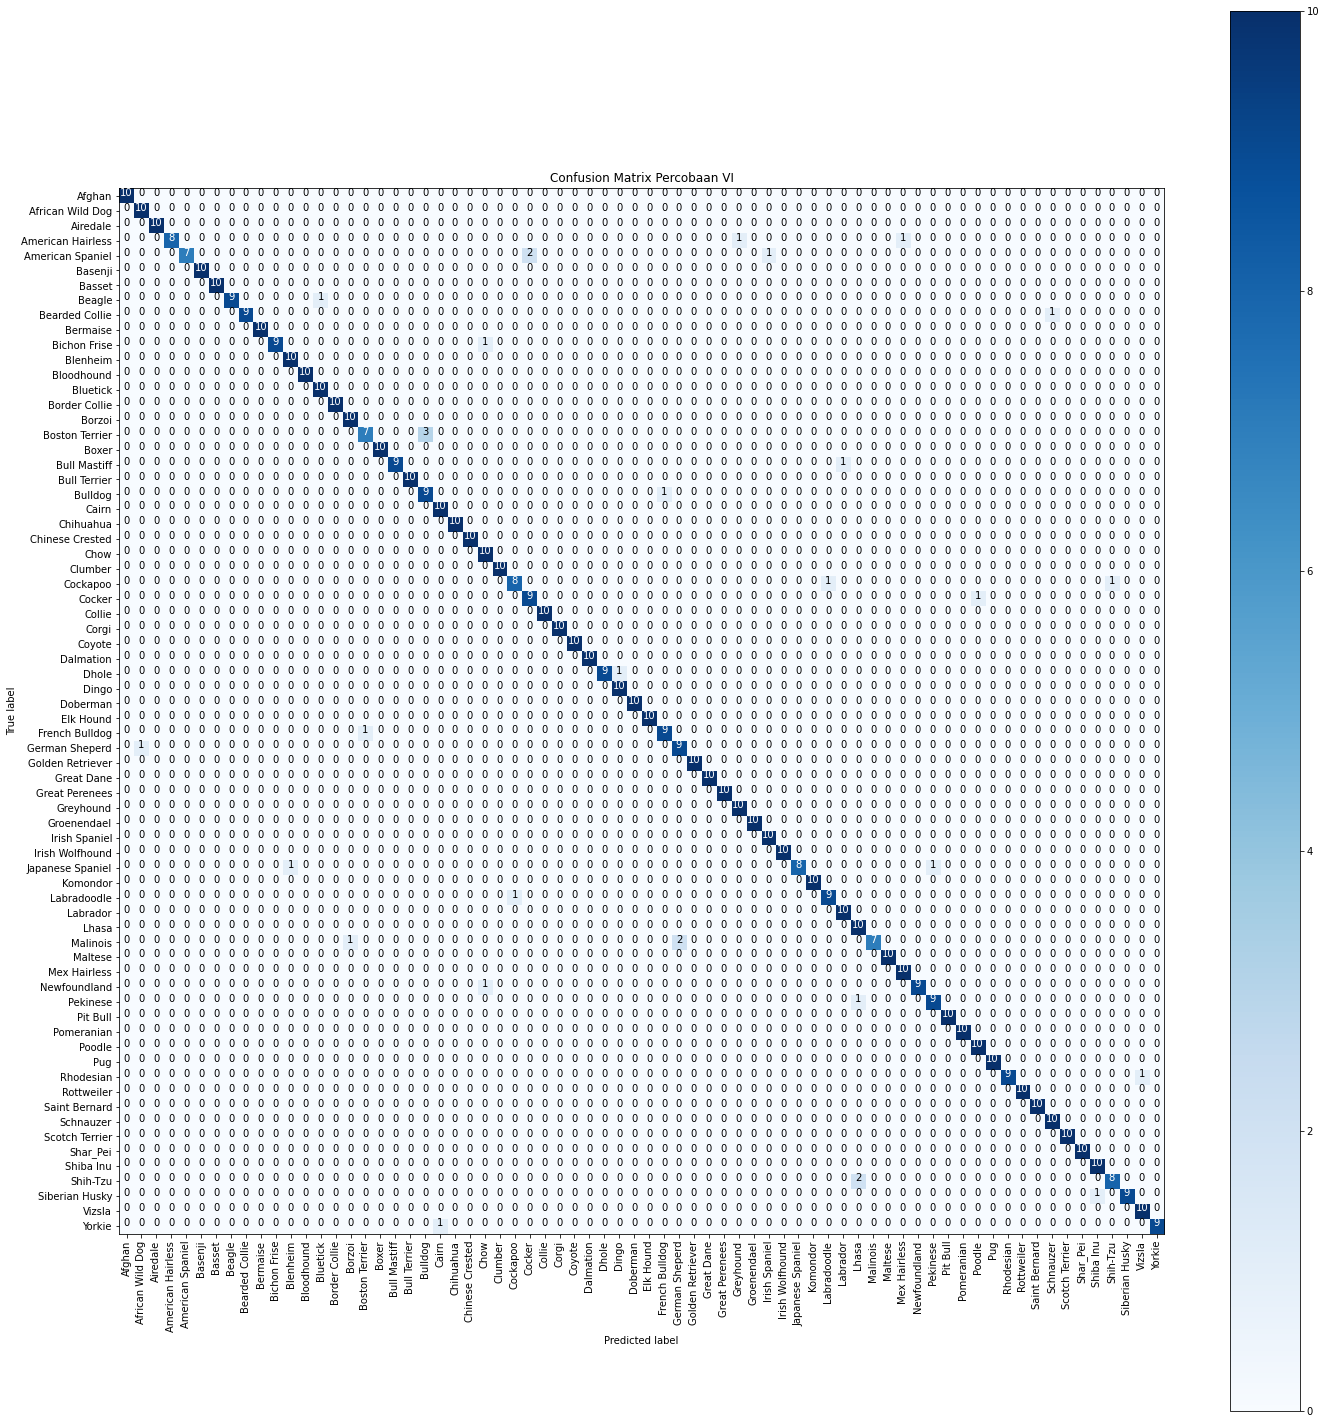

In [54]:
cm_plot_labels = ['Afghan','African Wild Dog','Airedale','American Hairless','American Spaniel','Basenji','Basset','Beagle','Bearded Collie','Bermaise','Bichon Frise','Blenheim','Bloodhound','Bluetick','Border Collie','Borzoi','Boston Terrier','Boxer','Bull Mastiff','Bull Terrier','Bulldog','Cairn','Chihuahua','Chinese Crested','Chow','Clumber','Cockapoo','Cocker','Collie','Corgi','Coyote','Dalmation','Dhole','Dingo','Doberman','Elk Hound','French Bulldog','German Sheperd','Golden Retriever','Great Dane','Great Perenees','Greyhound','Groenendael','Irish Spaniel','Irish Wolfhound','Japanese Spaniel','Komondor','Labradoodle','Labrador','Lhasa','Malinois','Maltese','Mex Hairless','Newfoundland','Pekinese','Pit Bull','Pomeranian','Poodle','Pug','Rhodesian','Rottweiler','Saint Bernard','Schnauzer','Scotch Terrier','Shar_Pei','Shiba Inu','Shih-Tzu','Siberian Husky','Vizsla','Yorkie']
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix Percobaan VI')

### Classification Report - Percobaan 6

In [101]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

In [102]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)
print(report)

                   precision    recall  f1-score   support

           Afghan       1.00      1.00      1.00        10
 African Wild Dog       0.91      1.00      0.95        10
         Airedale       1.00      1.00      1.00        10
American Hairless       1.00      0.80      0.89        10
 American Spaniel       1.00      0.70      0.82        10
          Basenji       1.00      1.00      1.00        10
           Basset       1.00      1.00      1.00        10
           Beagle       1.00      0.90      0.95        10
   Bearded Collie       1.00      0.90      0.95        10
         Bermaise       1.00      1.00      1.00        10
     Bichon Frise       1.00      0.90      0.95        10
         Blenheim       0.91      1.00      0.95        10
       Bloodhound       1.00      1.00      1.00        10
         Bluetick       0.91      1.00      0.95        10
    Border Collie       1.00      1.00      1.00        10
           Borzoi       0.91      1.00      0.95       